In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# N0.4

In [2]:
f=lambda x : (x**2) - (1e51)

def bisect(f,a,b):
    tol = 1e-10
    fa=f(a)
    kmax = int(log2((b-a)/tol)+1)
    print("Estimated Number of iterations =", kmax, "iterations")
    for k in range(kmax):
        c=(a+b)/2
        fc=f(c)
        if sign(f(a)) != sign(f(c)):
            b=c
        else:
            a=c
            fa=fc
        k+=1
        if abs(b-a) < tol:
            print("Converged in {:d} iterations".format(k))
            break
    return c

xroot = bisect(f,2e25,4e25)
#print(xroot)
#print(f(xroot))
print("x = {:24.16f}".format(xroot))
print("f(x) = {:24.4e}".format(f(xroot)))

Estimated Number of iterations = 118 iterations
x = 31622776601683794681921536.0000000000000000
f(x) =               1.6615e+35


$\textbf{Can we actually achieve this tolerance?}$

No

$\textbf{Why?}$

Because we know that the iterations in bisection method is always converging to the xroot, and f(xroot) must be zero which is not the case in our calculations, then we can achieve this tolerance.

$\textbf{How would you choose a more appropriate tolerance?}$

Since the appropriate tolerance depends on the number of iterations N, and N depends only on the initial interval $[a_{o}, b_{o}]$ bracketing the root. Therefore the interval length after N iterations is $\frac{ b_{o} - a_{o}}{2^{N}}$ and this must be less or equal to $\tau$  to obtain an accuracy of $\tau$ i.e. $$\frac{ b_{o} - a_{o}}{2^{N}} \le \tau$$


# No. 5

In [3]:
def fixed_point(f,xo,beta):
    x=xo #initial gues
    kmax=100
    tol=1e-10
    for k in range(kmax):
        x1=f(x)
        if abs(x1-x) < tol:
            print('Tolerance achieved\n')
            xroot=x1
            break
        x=x1
    print('The root = ',x1)
    print('Number of iterations = ',k)

In [4]:
f= lambda x:(1/3)*(x**3)-(x**2)+(4/3)*beta
beta=0.1
xo=0.1 
fixed_point(f,xo,beta)

Tolerance achieved

The root =  0.1195995366894333
Number of iterations =  13


In [5]:
f= lambda x:(1/3)*(x**3)-(x**2)+(4/3)*beta
beta=0.95
xo=0.1
fixed_point(f,xo,beta)

The root =  0.7942962233400211
Number of iterations =  99


# $\beta=0.1$

<IPython.core.display.Javascript object>


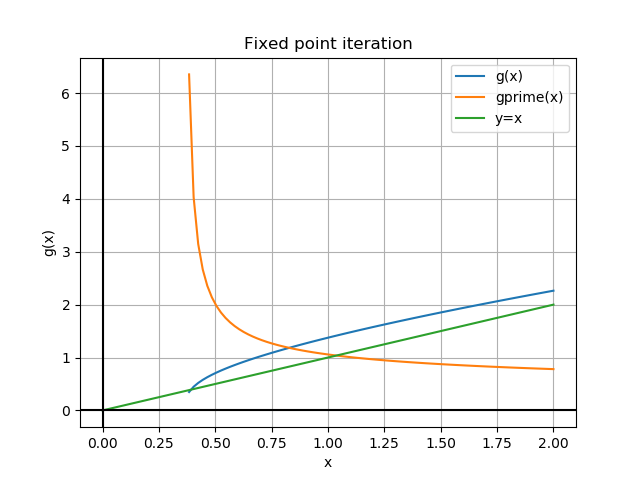

/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [6]:
beta=0.1
#let f(x)=0 be written in the form x=g(x)
#first function g(x)
x=linspace(0,2,100)
g=lambda x:(3*(x**2)-(4*beta))**(1/3)
gprime=lambda x:(2*x)/(((3*(x**2))-(4*beta))**(2/3))
y=lambda x:x

figure(1)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label='gprime(x)')
plot(x,y(x),label='y=x')
xlabel('x')
ylabel('g(x)')
title('Fixed point iteration')
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()
legend()
show()

From the graph above, it is easily seen that for all x $\in$ $[0,2]$, g(x) does not take every value in the interval $[0,2]$, even though it intersects with y=x. And also $g^{\prime}(x)$ exists but doesn't satisfy $|g^{\prime}(x)| \le r$ for r between $(0,1)$. therefore x=g(x) doesnot have a unique solution, hence doesn't converge for g(x) $\in$ $[0,2]$

<IPython.core.display.Javascript object>


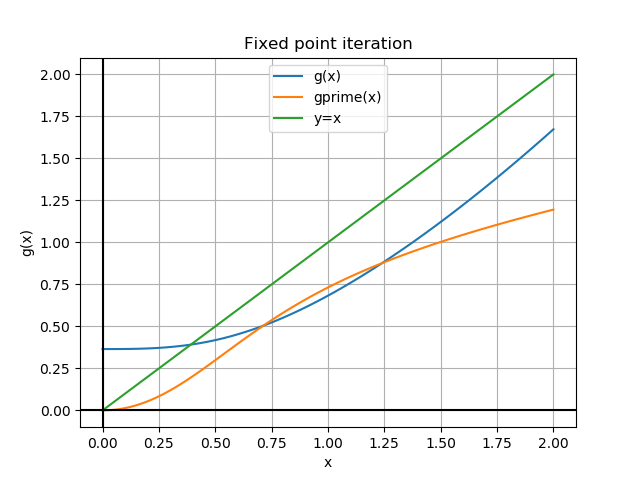

In [7]:
beta=0.1
#let f(x)=0 be written in the form x=g(x)
#second function g(x)
x=linspace(0,2,100)
g=lambda x:((1/3)*(x**3)+((4/3)*beta))**(1/2)
gprime=lambda x:((sqrt(3))*(x**2))/(2*sqrt((4*beta)+(x**3)))
y=lambda x:x

figure(2)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label='gprime(x)')
plot(x,y(x),label='y=x')
xlabel('x')
ylabel('g(x)')
title('Fixed point iteration')
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()
legend()
show()

From the graph above, it is easily seen that for all x $\in$ $[0,2]$, g(x)  takes on every value in the interval $[0,2]$, and it intersects with y=x. Since also $g^{\prime}(x)$ exists and satisfies $|g^{\prime}(x)| \le r$ for r between $(0,1)$. therefore x=g(x) has a unique solution between $[0,2]$, hence x coverges to a fixed point $\alpha$ for g(x) $\in$ $[0,2]$, at a point where g(x) intersects y=x.

<IPython.core.display.Javascript object>


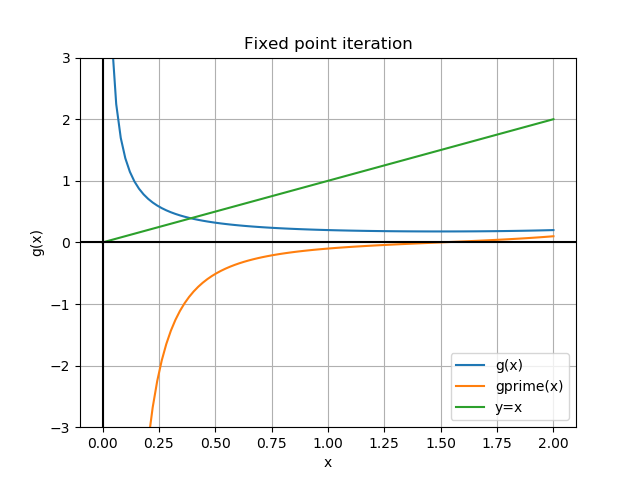

/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [8]:
beta=0.1
#let f(x)=0 be written in the form x=g(x)
#third function g(x)
x=linspace(0,2,100)
g=lambda x:(-4*beta)/((x**2)-(3*x))
gprime=lambda x:((4*beta)*((2*x)-3))/(((x-3)**2)*(x**2))
y=lambda x:x

figure(3)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label='gprime(x)')
plot(x,y(x),label='y=x')
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()
xlabel('x')
ylabel('g(x)')
ylim(-3,3)
title('Fixed point iteration')
legend()
show()

From the graph above, it is easily seen that for all x $\in$ $[0,2]$, g(x) does not take every value in the interval $[0,2]$, since the last point is $-\infty$ hence diverges, even though it intersects with y=x. and that $g^{\prime}(x)$ exists and satisfis $|g^{\prime}(x)| \le r$ for r between $(0,1)$. Therefore x=g(x) doesnot have a unique solution, hence doesn't converge for g(x) $\in$ $[0,2]$

# $\beta=0.95$

<IPython.core.display.Javascript object>


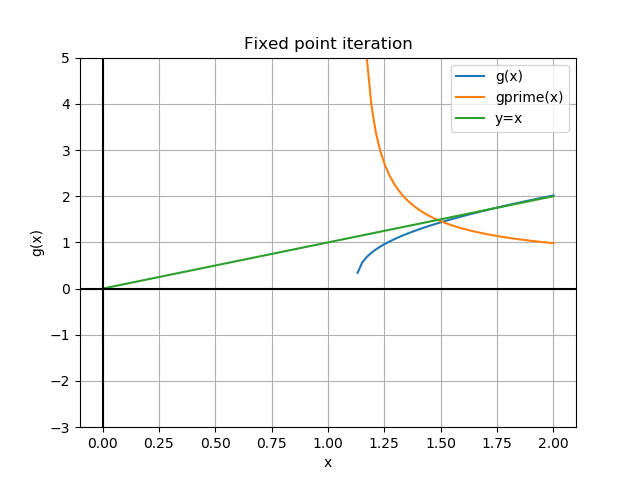

/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [9]:
beta=0.95
#let f(x)=0 be written in the form x=g(x)
#first function g(x)
x=linspace(0,2,100)
g=lambda x:(3*(x**2)-(4*beta))**(1/3)
gprime=lambda x:(2*x)/(((3*(x**2))-(4*beta))**(2/3))
y=lambda x:x

figure(4)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label='gprime(x)')
plot(x,y(x),label='y=x')
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()
xlabel('x')
ylabel('g(x)')
ylim(-3,5)
title('Fixed point iteration')
legend()
show()

From the graph above, it is easily seen that for all x $\in$ $[0,2]$, g(x) does not take every value in the interval $[0,2]$, even though it intersects with y=x. And also $g^{\prime}(x)$ exists but doesn't satisfy $|g^{\prime}(x)| \le r$ for r between $(0,1)$, since it doesnot even exist in that range. therefore x=g(x) doesnot have a unique solution, hence doesn't converge for g(x) $\in$ $[0,2]$

In [10]:
beta=0.95
#let f(x)=0 be written in the form x=g(x)
#second function g(x)
x=linspace(0,2,100)
g=lambda x:((1/3)*(x**3)+((4/3)*beta))**(1/2)
gprime=lambda x:((sqrt(3))*(x**2))/(2*sqrt((4*beta)+(x**3)))
y=lambda x:x

figure(5)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label='gprime(x)')
plot(x,y(x),label='y=x')
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()
xlabel('x')
ylabel('g(x)')
title('Fixed point iteration')
legend()
show()

<IPython.core.display.Javascript object>

From the graph above, it is easily seen that for all x $\in$ $[0,2]$, g(x)  takes on every value in the interval $[0,2]$, and it intersects with y=x. Since also $g^{\prime}(x)$ exists and satisfies $|g^{\prime}(x)| \le r$ for r between $(0,1)$. therefore x=g(x) has a unique solution between $[0,2]$, hence x coverges to a fixed point $\alpha$ for g(x) $\in$ $[0,2]$, at a point where g(x) intersects y=x.

In [11]:
beta=0.95
#let f(x)=0 be written in the form x=g(x)
#third function g(x)
x=linspace(0,2,100)
g=lambda x:(-4*beta)/((x**2)-(3*x))
gprime=lambda x:((4*beta)*((2*x)-3))/(((x-3)**2)*(x**2))
y=lambda x:x

figure(6)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label='gprime(x)')
plot(x,y(x),label='y=x')
xlabel('x')
ylabel('g(x)')
ylim(-3,3)
title('Fixed point iteration')
axhline(y=0, color='k')
axvline(x=0, color='k')
grid()
legend()
show()

<IPython.core.display.Javascript object>

/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/yao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


From the graph above, it is easily seen that for all x $\in$ $[0,2]$, g(x) does not take every value in the interval $[0,2]$, since the last point is $-\infty$ hence diverges, even though it intersects with y=x. and that $g^{\prime}(x)$ exists and satisfis $|g^{\prime}(x)| \le r$ for r between $(0,1)$. Therefore x=g(x) doesnot have a unique solution, hence doesn't converge for g(x) $\in$ $[0,2]$

# No.6

In [12]:
r=2 #radius
dm=0.04 #density of marble
dw=0.998 #density of water

beta=dm/dw

f=lambda x:(1/3)*(x**3)-(x**2)+(4/3)*beta
h=lambda x:r*x
ao,bo=0,2
n=100
x=linspace(ao,bo,n)

root=zeros(len(x))
mark=zeros(len(x))
mark[0]=0



figure(7)
plot(x,f(x),label='f(x)')
ylim(-0.2,0.2)
grid()
xlabel('x')
ylabel('f(x)')
title('A graph of f(x) against x')
axhline(y=0, color='k')
axvline(x=0, color='k')

def bisection(f,a,b):
    tol=1e-10
    fa=f(a)
    kmax=int(log2((b-a)/tol)+1)
    k=0
    while k<kmax:
        c=(a+b)/2
        fc=f(c)
        if fa*fc<0:
            b=c
        else:
            a=c
            fa=fc
        k+=1
        if abs(b-a)<tol:
            break
    return c

xroot=bisection(f,ao,bo)
root[0]=xroot
plot(root,mark,markevery=xroot, ls="", marker="o", label="xroot")
legend()
show()
print('The depth is: ',h(xroot))

<IPython.core.display.Javascript object>

The depth is:  0.48211818968411535


# N0.8

# a)

In [13]:
x=lambda y:y*exp(y)
#xprime=lambda y:(y+1)*exp(y)
y=linspace(-8,5,100)
figure(8)
plot(y,x(y))
ylim(-1,6)
grid()
xlabel('y')
ylabel('x(y)')
title('A graph of x(y) against y')
axhline(y=0, color='k')
axvline(x=0, color='k')
show()

<IPython.core.display.Javascript object>

Acording to the graph above we have a turning point between 0 and 2, therefore the curve $x=y\exp(y)$ fails the horizontal test. So since $L(x)=\frac{dx}{dy}=(y+1)\exp(y)$, at turning point: $$\frac{dx}{dy}=0 \implies (y+1)\exp(y)=0$$
Thus,

either $$\exp(y)=0 \implies y=\infty$$ or $$y+1=0\implies y=-1$$

For the turning points,using $x=y\exp(y)$:

for $y=-1 \implies x= -1/e$ and $\infty$ for $y=\infty$ respectively. 

Therefore concluding that the range of $x=y\exp(y)$ is $[-1/e,\infty)$, since L(x)is the inverse of $y\exp(y)$, and its known that range of $y\exp(y)$ is the domain of its inverse, L(x).

# b)

In [14]:
def L(x):
    f=lambda y:y*exp(y)
    fprime=lambda y:(y+1)*exp(y)
    
    tol=1e-10
    n=100
    
    #intial guess yo 
    if x<1:
        yo=-0.01
    else:
        yo=log(x)
        
    i=0
    while i<n:
        fo=f(yo)
        fpo=fprime(yo)
        yn=yo-(fo-x)/fpo
        if abs(yn-yo)<tol:
            break
        yo=yn
        i+=1
    return yn
        

# c)

In [15]:
y=lambda x:(x+(1/x) -1)*exp(x)
g=lambda x:(x/(x+1))*(x+(((x+(1/x) -1)*exp(x))/(x*exp(x))))
gprime=lambda x:((x**4)+(2*x**3)+(2*x**2)-(2*x)-1)/((x**2)*((x+1)**2))

x=linspace(-3,3)
figure(11)
plot(x,g(x),label='g(x)')
plot(x,gprime(x),label="g'(x)")
plot(x,x,label='y=x')
grid()
axhline(y=0, color='k')
axvline(x=0, color='k')
ylabel('g(x)')
xlabel('x')
ylim(-3,3)
title('A graph of g(x) against x')
legend()
show()

<IPython.core.display.Javascript object>

From the graph above, it is easily seen that for all x $\in$ $[-3,3]$, g(x)  takes on every value in the interval $[-3,3]$, and it intersects with y=x. Since also $g^{\prime}(x)$ exists and satisfies $|g^{\prime}(x)| \le r$ for r between $(0,1)$. therefore x=g(x) has a unique solution between $[0,3]$, hence x coverges to a fixed point $\alpha$ for g(x) $\in$ $[0,3]$, at a point where g(x) intersects y=x for x $\in [0,3]$. Hence since x=g(x) converges then also Newton's method will also converge.

In [16]:
x = linspace(-1/exp(1), 5,1000)

def g(x, y):
    
    return (x/(x+1))*(x + y/(x*exp(x)))

def dg(x, y):
    
    return ((x+2)/((x+1)**2))*(x - (y/exp(x)))

figure(13)

plot(x, g(x, 1), label = 'g(x)')
plot(x, dg(x, 1), label = "g'(x)")
plot(x, x, label = 'y = x')
axhline(color = 'gray')
axvline(color = 'gray')
title('Plot for y = 1')
ylim(-1, 3)
xlim(-1,5)
legend()
grid()

<IPython.core.display.Javascript object>

# d)

In [17]:
#check that L(xe^x)=x
x=[3,10,101]
for i in x:
    print('x=',i,'=',L(i*exp(i)))

x= 3 = 3.0
x= 10 = 10.0
x= 101 = 101.0


Hence we are accurately computing $L(x\exp(x))=x$

# e)

In [18]:
x=linspace(-1/e,10) #for aprinciple branch
L1=vectorize(L)

y=lambda x:x*exp(x)

figure(9)
plot(x,L1(x),label='L(x)')
plot(x,y(x),label='y=x*exp(x)')
plot(x,x,label='y=x')
axhline(y=0, color='k')
axvline(x=0, color='k')
ylabel('L(x) and y')
xlabel('x')
title('A graph of L(x) against x')
legend()
ylim(-3,7)
grid()
show()

<IPython.core.display.Javascript object>

Graphically we can see that one is the opposite of the other hence one is the inverse of the other

# No.9

# a)

Following the steps above, at h(t)=0, we have \begin{equation}\frac{33}{784}t + \exp(-0.3t)=1 \quad (1)\end{equation} Comparing it with the general form: $$At + \exp(Bt)=1$$ we clearly see that $A=\frac{33}{784}$ and $B=-0.3$.

Using the transformation $$t=-\frac{1}{B}u +\frac{1}{A}$$ and substituting for t in equation $(1)$ we obtain $$u\exp(u)=\frac{B}{A}\exp(\frac{B}{A})$$ which implicitly defines the Lambert W function.

In [19]:
A=33/784; B=-0.3
C=B/A

#calling the Lambert W function L(x) to use it to calculate u
u=L(C*exp(C))

#time t_g for the rocket to hit the ground
t_g=lambda u:-(1/B)*u+(1/A)
print("t_g = {:8f}".format(t_g(u)),'Seconds')

t_g = 23.738391 Seconds


# b)

In [20]:
h=lambda t:-33*t + 784*(1-exp(-0.3*t))
t=linspace(0,30)
root=zeros(len(t))
root[0]=t_g(u)
mark=zeros(len(t))
mark[0]=0

figure(10)
plot(t,h(t),label='h(t)')
plot(root,mark,markevery=t_g(u), ls="", marker="o", label="tg")
axhline(y=0, color='k')
axvline(x=0, color='k')
ylabel('h(t)')
xlabel('t')
title('A graph of h(t) against t')
legend()
grid()
show()


<IPython.core.display.Javascript object>

The value of $t_{g}$ is correct, since we cosidered that at $h=0$ is the ground, and looking on the graph, this is the exact time at which $h(t)$ is zero.

# c)

Since in our equation h(t), on the right hand side t appears both inside and outside in the exponential function. So this means solving this equation directly will give us only on solution, which is not right, since h(t) is a multivalued function, thus generally it has morethan on solution. And also since we are dealing with rocket height, we expect large positive values of both t and h, with these large values t, $\exp(t)$, and $t\exp(t)$ grow similarly implying that also their inverse functions will have similar asymptotes. So $t\exp(t)$ will have two real branches. Giving better results than solving it directly.